# Demo for tfcochleagram

Loads an audio file and generates a cochleagram using the tfcochleagram.py library. 



In [6]:
from __future__ import division
# For displaying audio and images in notebook
import IPython.display as ipd

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
import tfcochleagram

# Helper functions for loading audio
from utils import *


### Load some demo audio and play it.  

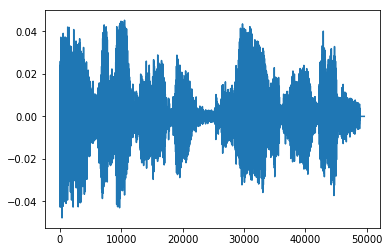

In [2]:
#Import the test_audio
test_audio, SR = load_audio_wav_resample('speech_1.wav', DUR_SECS='full', resample_SR=16000)
# Generally a good idea to rms normalize the audio
test_audio = rms_normalize_audio(test_audio, rms_value=0.01)

# Using rFFT below, and it is currently implemented only for even # signals. 
if len(test_audio.ravel())%2:
    test_audio = test_audio[:-1]

plt.plot(test_audio)
ipd.Audio('speech_1.wav')

## Make the cochleagram using tfcochleagram 
Set up the tensorflow environment and make the input node. 

Text(0.5,1,'Filter Response Functions')

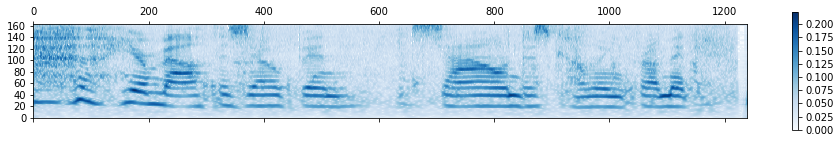

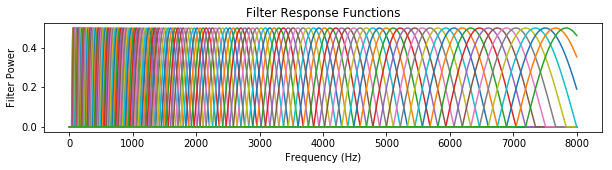

In [3]:
with tf.Graph().as_default():
    if len(test_audio.shape) == 1: # we need to make sure the input node has a first dimension that corresponds to the batch size
        test_audio = np.expand_dims(test_audio,0) 
    nets = {}
    # tfcochleagram expects a dictionary with 'input_signal' defined for the input audio
    nets['input_signal'] = tf.Variable(test_audio, dtype=tf.float32)
    nets = tfcochleagram.cochleagram_graph(nets, SR, rFFT=True)
    with tf.Session() as sess:
        cochleagram = nets['cochleagram'].eval(feed_dict = {nets['input_signal']:test_audio})       
        filters_out = nets['filts_tensor'].eval()

plt.matshow(cochleagram[0,:,:,0], origin='lower', cmap='Blues')
plt.colorbar()

# Plot the filters as well
plt.figure(figsize=(10,2))
x_axis = (SR/test_audio.shape[-1]) * np.arange(test_audio.shape[-1]/2+1)
for i in range(filters_out.shape[1]):
    plt.plot(x_axis, np.abs(np.squeeze(filters_out)[i,:]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Power')
plt.title('Filter Response Functions')


### Now run again but remove the compression

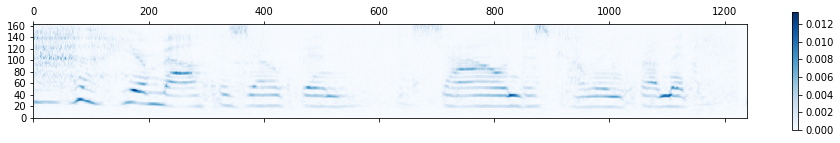

In [4]:
with tf.Graph().as_default():
    if len(test_audio.shape) == 1: # we need to make sure the input node has a first dimension that corresponds to the batch size
        test_audio = np.expand_dims(test_audio,0)
    # tfcochleagram expects a dictionary with 'input_signal' defined for the input audio
    nets = {}
    nets['input_signal'] = tf.Variable(test_audio, dtype=tf.float32)
    nets = tfcochleagram.cochleagram_graph(nets, SR, compression='none') # use the default values
    with tf.Session() as sess:
        cochleagram = nets['cochleagram'].eval(feed_dict = {nets['input_signal']:test_audio})

plt.matshow(cochleagram[0,:,:,0], origin='lower', cmap='Blues')
plt.colorbar()

# Similar cochleagrams to McDermott et al. 2011
https://linkinghub.elsevier.com/retrieve/pii/S0896-6273(11)00562-9

Text(0.5,1,'Filter Response Functions')

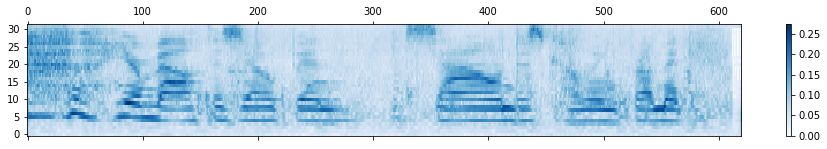

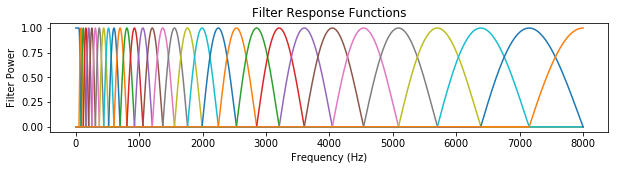

In [5]:
with tf.Graph().as_default():
    if len(test_audio.shape) == 1: # we need to make sure the input node has a first dimension that corresponds to the batch size
        test_audio = np.expand_dims(test_audio,0) 
    nets = {}
    # tfcochleagram expects a dictionary with 'input_signal' defined for the input audio
    nets['input_signal'] = tf.Variable(test_audio, dtype=tf.float32)
    nets = tfcochleagram.cochleagram_graph(nets, SR, ENV_SR=200, N=30, SAMPLE_FACTOR=1, rFFT=True, erb_filter_kwargs={'no_lowpass':False, 'no_highpass':False})
    with tf.Session() as sess:
        cochleagram = nets['cochleagram'].eval(feed_dict = {nets['input_signal']:test_audio})       
        filters_out = nets['filts_tensor'].eval()

plt.matshow(cochleagram[0,:,:,0], origin='lower', cmap='Blues', aspect='auto')
plt.colorbar()

# Plot the filters as well
plt.figure(figsize=(10,2))
x_axis = (SR/test_audio.shape[-1]) * np.arange(test_audio.shape[-1]/2+1)
for i in range(filters_out.shape[1]):
    plt.plot(x_axis, np.abs(np.squeeze(filters_out)[i,:]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Power')
plt.title('Filter Response Functions')
